In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

In [7]:
file_path ="C://Users//om//Desktop//AAPL.csv"
apple_stock_data = pd.read_csv(file_path)

In [8]:
apple_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [10]:
# Convert the Date column to datetime format
apple_stock_data['Date'] = pd.to_datetime(apple_stock_data['Date'], format='%d-%m-%Y')
apple_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [12]:
# Sort the data by Date
apple_stock_data.sort_values(by='Date', inplace=True)
apple_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [13]:
# Check for missing values
missing_values = apple_stock_data.isnull().sum()
print("Missing values:\n", missing_values)

# Display the first few rows to verify the data
print(apple_stock_data.head())

Missing values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
        Date       Open       High        Low      Close  Adj Close    Volume
0 2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1 2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2 2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3 2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4 2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100


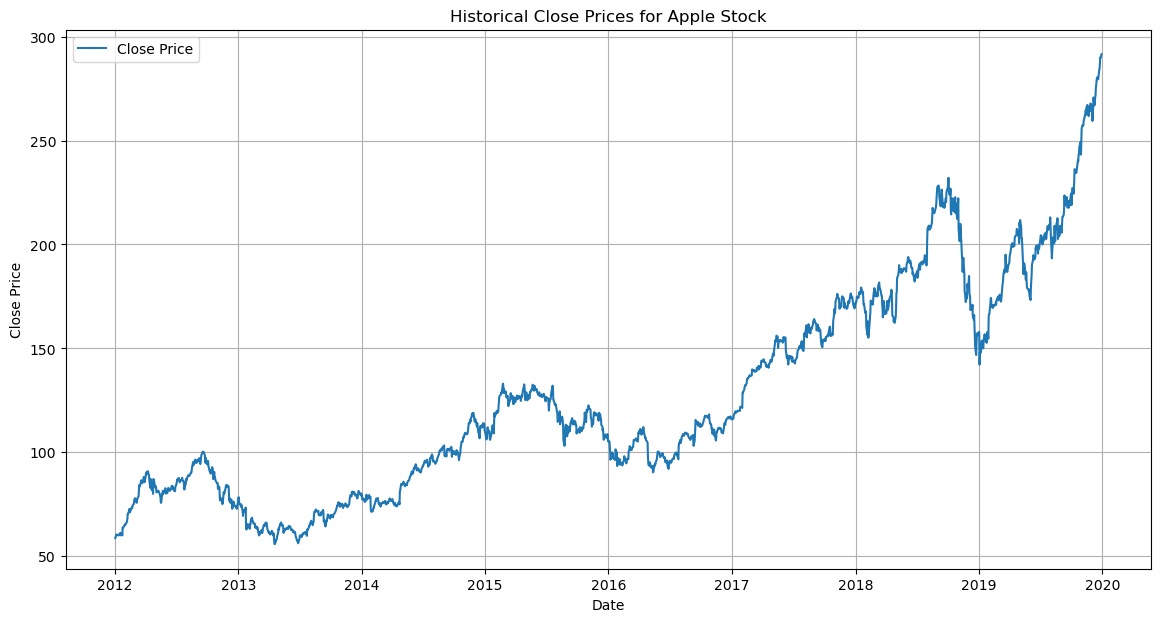

In [14]:
# Plot the historical Close prices
plt.figure(figsize=(14, 7))
plt.plot(apple_stock_data['Date'], apple_stock_data['Close'], label='Close Price')
plt.title('Historical Close Prices for Apple Stock')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

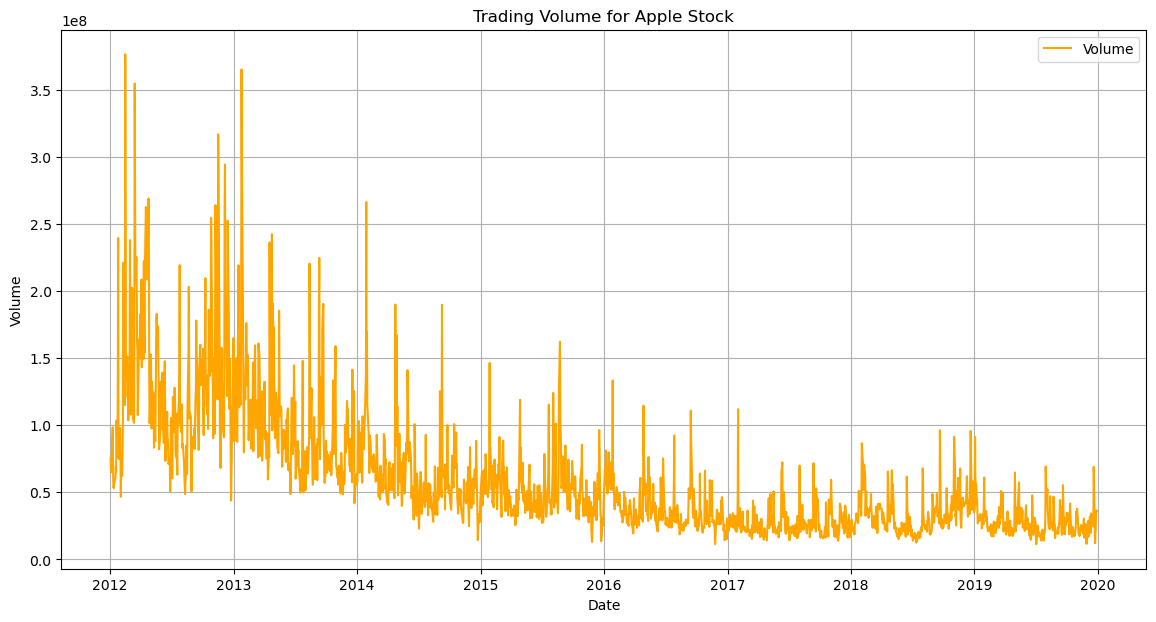

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(apple_stock_data['Date'], apple_stock_data['Volume'], label='Volume', color='orange')
plt.title('Trading Volume for Apple Stock')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
test_size = 365  # Assuming approximately 365 trading days in a year
train_data = apple_stock_data[:-test_size]
test_data = apple_stock_data[-test_size:]

In [17]:
test_size

365

In [18]:
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

Training set size: 1646
Test set size: 365


In [19]:
# Prepare the data for ARIMA model
train_close = train_data['Close']
test_close = test_data['Close']

# Fit the ARIMA model
model = ARIMA(train_close, order=(5, 1, 0))  # Example order, tune as necessary
model_fit = model.fit()

In [20]:
train_close

0        58.747143
1        59.062859
2        59.718571
3        60.342857
4        60.247143
           ...    
1641    191.029999
1642    191.330002
1643    190.910004
1644    191.449997
1645    190.399994
Name: Close, Length: 1646, dtype: float64

In [22]:
test_close

1646    191.880005
1647    191.440002
1648    191.610001
1649    193.000000
1650    194.820007
           ...    
2006    284.000000
2007    284.269989
2008    289.910004
2009    289.799988
2010    291.519989
Name: Close, Length: 365, dtype: float64

In [23]:
model

In [24]:
model_fit

In [25]:
# Make predictions
predictions = model_fit.forecast(steps=test_size)
test_data['Predictions'] = predictions.values

C:\Users\mvish\AppData\Local\Temp\ipykernel_62928\2407115163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = predictions.values


In [26]:
predictions

1646    190.306065
1647    190.299896
1648    190.336864
1649    190.273634
1650    190.283668
           ...    
2006    190.286289
2007    190.286289
2008    190.286289
2009    190.286289
2010    190.286289
Name: predicted_mean, Length: 365, dtype: float64

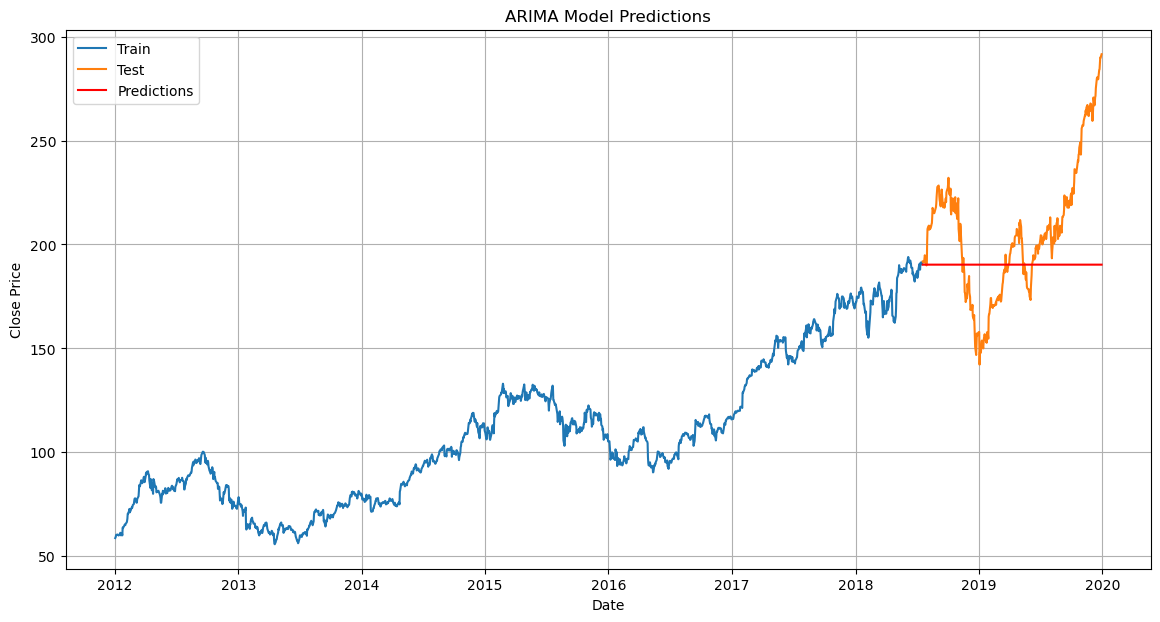

In [27]:
plt.figure(figsize=(14, 7))
plt.plot(train_data['Date'], train_close, label='Train')
plt.plot(test_data['Date'], test_close, label='Test')
plt.plot(test_data['Date'], test_data['Predictions'], label='Predictions', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Forecast the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

In [29]:
forecast

1646    190.306065
1647    190.299896
1648    190.336864
1649    190.273634
1650    190.283668
1651    190.286890
1652    190.288792
1653    190.284821
1654    190.286256
1655    190.286402
1656    190.286415
1657    190.286171
1658    190.286306
1659    190.286299
1660    190.286294
1661    190.286281
1662    190.286292
1663    190.286290
1664    190.286289
1665    190.286289
1666    190.286290
1667    190.286289
1668    190.286289
1669    190.286289
1670    190.286289
1671    190.286289
1672    190.286289
1673    190.286289
1674    190.286289
1675    190.286289
Name: predicted_mean, dtype: float64

In [30]:
# Create a date range for the forecast
last_date = apple_stock_data['Date'].iloc[-1]
forecast_dates = pd.date_range(last_date, periods=forecast_steps + 1, closed='right')

C:\Users\mvish\AppData\Local\Temp\ipykernel_62928\808303539.py:3: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(last_date, periods=forecast_steps + 1, closed='right')


In [31]:
last_date

Timestamp('2019-12-30 00:00:00')

In [32]:
forecast_dates

DatetimeIndex(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
               '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11',
               '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19',
               '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29'],
              dtype='datetime64[ns]', freq='D')

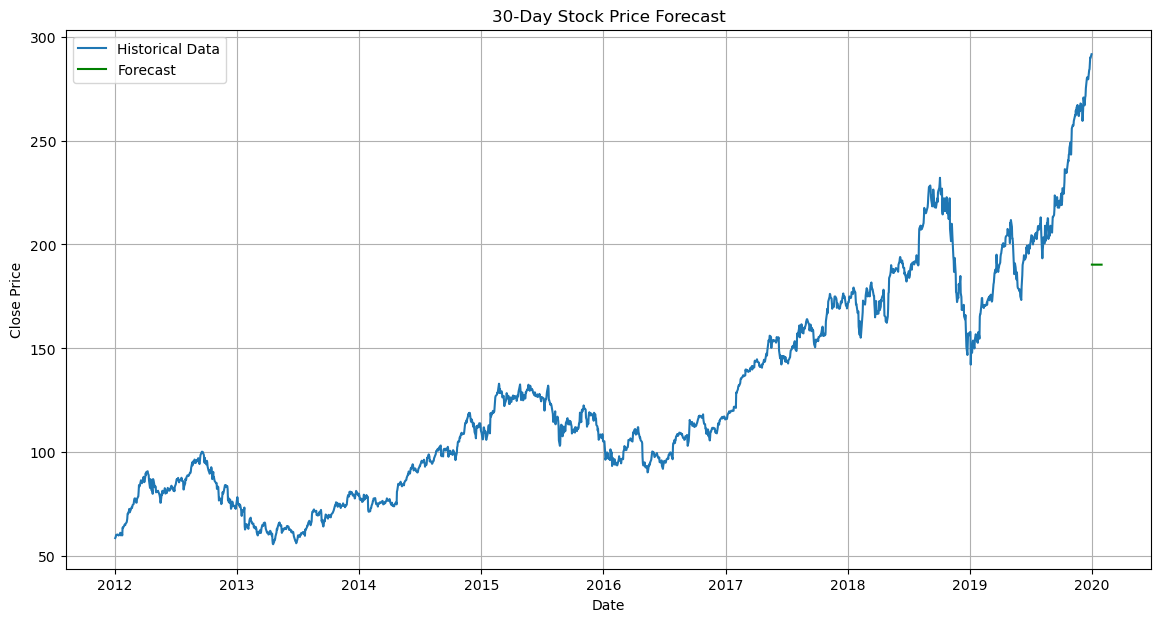

In [33]:
plt.figure(figsize=(14, 7))
plt.plot(apple_stock_data['Date'], apple_stock_data['Close'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='Forecast', color='green')
plt.title('30-Day Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()